# Imports

In [129]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

# Load Data

In [3]:
# load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,PIE,current_avg_salary,age,year_played,...,JERSEY_46,JERSEY_51,JERSEY_54,JERSEY_55,JERSEY_67,JERSEY_77,JERSEY_81,JERSEY_88,JERSEY_95,JERSEY_99
0,0.55,0.258993,0.058824,0.374214,0.133929,0.528169,0.696078,0.084580,0.047619,0.058824,...,0,0,0,0,0,0,0,0,0,0
1,0.95,0.848921,0.294118,0.138365,0.017857,0.274648,0.850490,0.076781,0.571429,0.294118,...,0,1,0,0,0,0,0,0,0,0
2,0.55,0.345324,0.588235,0.707547,0.491071,0.422535,0.835784,0.953707,0.523810,0.588235,...,0,0,0,0,0,0,0,0,0,0
3,0.75,0.776978,0.235294,0.940252,0.294643,0.809859,1.000000,0.710704,0.333333,0.352941,...,0,0,0,0,0,0,0,0,0,0
4,0.35,0.057554,0.176471,0.490566,0.455357,0.492958,0.789216,0.358982,0.190476,0.235294,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,PIE,current_avg_salary,age,year_played,...,JERSEY_46,JERSEY_51,JERSEY_54,JERSEY_55,JERSEY_67,JERSEY_77,JERSEY_81,JERSEY_88,JERSEY_95,JERSEY_99
0,0.55,0.395683,0.352941,0.273585,0.071429,0.387324,0.715686,0.164371,0.523810,0.352941,...,0,0,0,0,0,0,0,0,0,0
1,0.35,0.129496,0.058824,0.081761,0.035714,0.056338,0.625000,0.039371,0.285714,0.058824,...,0,0,0,0,0,0,0,0,0,0
2,0.40,0.237410,0.117647,0.433962,0.276786,0.161972,0.723039,0.039501,0.190476,0.117647,...,0,0,0,0,0,0,0,0,0,0
3,0.40,0.273381,0.176471,0.210692,0.125000,0.232394,0.715686,0.039233,0.380952,0.176471,...,0,0,0,0,0,0,0,0,0,0
4,0.45,0.129496,0.058824,0.047170,0.000000,0.035211,0.901961,0.035448,0.095238,0.058824,...,0,0,0,0,0,0,0,0,0,0


# Split data

In [6]:
X_train = train.drop(columns='current_avg_salary')

In [7]:
X_train.head()

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,PIE,age,year_played,SCHOOL_Arizona,...,JERSEY_46,JERSEY_51,JERSEY_54,JERSEY_55,JERSEY_67,JERSEY_77,JERSEY_81,JERSEY_88,JERSEY_95,JERSEY_99
0,0.55,0.258993,0.058824,0.374214,0.133929,0.528169,0.696078,0.047619,0.058824,0,...,0,0,0,0,0,0,0,0,0,0
1,0.95,0.848921,0.294118,0.138365,0.017857,0.274648,0.850490,0.571429,0.294118,0,...,0,1,0,0,0,0,0,0,0,0
2,0.55,0.345324,0.588235,0.707547,0.491071,0.422535,0.835784,0.523810,0.588235,0,...,0,0,0,0,0,0,0,0,0,0
3,0.75,0.776978,0.235294,0.940252,0.294643,0.809859,1.000000,0.333333,0.352941,0,...,0,0,0,0,0,0,0,0,0,0
4,0.35,0.057554,0.176471,0.490566,0.455357,0.492958,0.789216,0.190476,0.235294,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train = train.current_avg_salary

In [9]:
X_test = test.drop(columns='current_avg_salary')
y_test = test.current_avg_salary

In [29]:
y_train

0      0.084580
1      0.076781
2      0.953707
3      0.710704
4      0.358982
         ...   
277    0.082143
278    0.037132
279    0.030341
280    0.083708
281    0.035448
Name: current_avg_salary, Length: 282, dtype: float64

# First Model - Linear Regression

In [11]:
# fit the model
lm = LinearRegression().fit(X_train, y_train)

In [12]:
# use model to predict botn train and test data
y_tr_pred = lm.predict(X_train)
y_te_pred = lm.predict(X_test)

In [13]:
# r^2 - train, test
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
r2

(0.8723915793909444, -8.531261547455891e+20)

In [14]:
# MAE - train, test
mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
mae

(0.06764734204828449, 1818474257.4524186)

In [15]:
# MSE - train, test
mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
mse

(0.007755372832485657, 4.703907369628075e+19)

# Second Model - Random Forest Regression

In [63]:
# fit the model
regr = RandomForestRegressor(random_state=47)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=47)

In [59]:
# use model to predict botn train and test data
y_tr_pred = regr.predict(X_train)
y_te_pred = regr.predict(X_test)

In [60]:
# r^2 - train, test
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
r2

(0.956264137564439, 0.7400474352538993)

In [61]:
# MAE - train, test
mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
mae

(0.03541386611952217, 0.0756716290162769)

In [62]:
# MSE - train, test
mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
mse

(0.002658037124189674, 0.014333082841980763)

## Hyperparameter search using GridSearchCV

In [30]:
# Print the accuracy from the testing data.
rf_default_cv_results = cross_validate(regr, X_train, y_train, cv=5)

In [31]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.75678941, 0.7094262 , 0.6501893 , 0.56024473, 0.72256069])

In [32]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.6798420639538107, 0.06899826762862693)

In [106]:
# GridSearchCV
# define parametes
n_est = list(range(108, 113, 1))
grid_params = {'n_estimators': n_est,
               'max_depth': [4,5,6, None]}
grid_params

{'n_estimators': [108, 109, 110, 111, 112], 'max_depth': [4, 5, 6, 7, None]}

In [107]:
# define GridSearchCV
rf_grid_cv = GridSearchCV(regr, grid_params,cv=5, n_jobs=-1)

In [108]:
# fit the data
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=47), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, None],
                         'n_estimators': [108, 109, 110, 111, 112]})

In [109]:
# find the best_params_
rf_grid_cv.best_params_

{'max_depth': 5, 'n_estimators': 112}

In [110]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.75461512, 0.70504104, 0.65253199, 0.5767102 , 0.72966737])

In [111]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.6837131434293185, 0.0632703015636976)

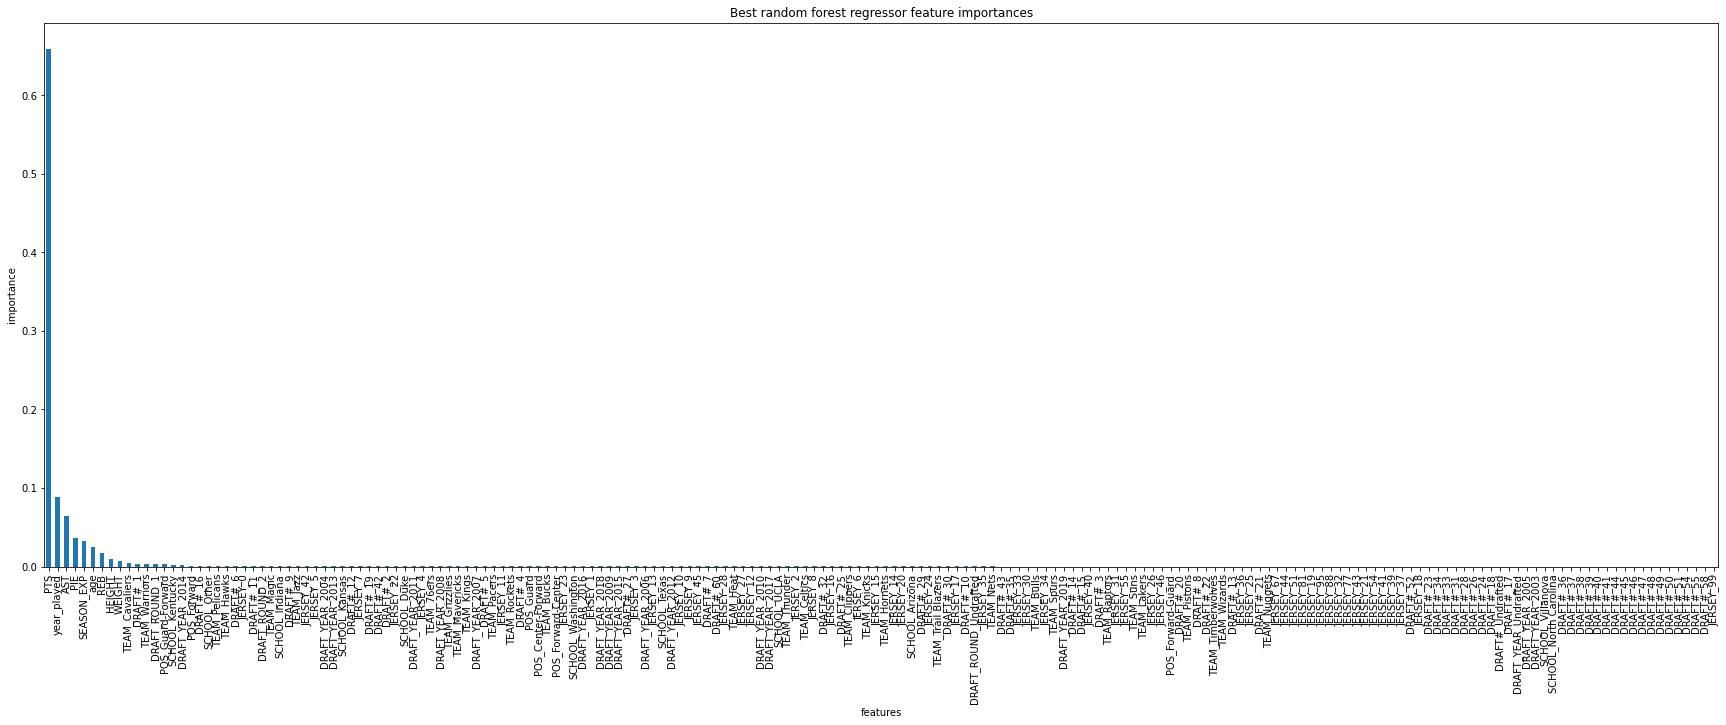

In [125]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(30, 10))
imps = rf_grid_cv.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

## Random forest regression model performance

In [115]:
regr_best_params = RandomForestRegressor(n_estimators = 112, max_depth = 5,  random_state=47)
regr_best_params.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=112, random_state=47)

In [116]:
# use the best_params model to predict both train and test data
y_tr_pred = regr_best_params.predict(X_train)
y_te_pred = regr_best_params.predict(X_test)

In [120]:
# r^2 - train, test
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
print('r2: ', r2)
# MAE - train, test
mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
print('mae: ', mae)
# MSE - train, test
mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
print ('mes: ', mse)

r2:  (0.8912754949768816, 0.7326161352229936)
mae:  (0.06250095293683211, 0.07964085815274138)
mes:  (0.006607707143911674, 0.014742824669573874)


In [126]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [127]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(0.09844355829736075, 0.00860908293278633)

In [128]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.07964085815274138

# Third Model - Knn regression

In [130]:
KNNrg = KNeighborsRegressor()
KNNrg.fit(X_train, y_train)

KNeighborsRegressor()

In [133]:
# use model to predict botn train and test data
y_tr_pred = KNNrg.predict(X_train)
y_te_pred = KNNrg.predict(X_test)

In [134]:
# r^2 - train, test
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
print('r2: ', r2)
# MAE - train, test
mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
print('mae: ', mae)
# MSE - train, test
mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
print ('mes: ', mse)

r2:  (0.4848443149803453, 0.19778898963180158)
mae:  (0.12209185219811397, 0.13365993127757606)
mes:  (0.03130846996642831, 0.04423175004865554)


## Hyperparameter search using GridSearchCV

In [141]:
# GridSearchCV
# define parametes
n_nei = list(range(11, 20, 1))
grid_params = {'n_neighbors': n_nei,
               'weights': ['uniform', 'distance']}
grid_params

{'n_neighbors': [11, 12, 13, 14, 15, 16, 17, 18, 19],
 'weights': ['uniform', 'distance']}

In [142]:
# define GridSearchCV
rf_grid_cv = GridSearchCV(KNNrg, grid_params,cv=5, n_jobs=-1)
# fit the data
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [11, 12, 13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [143]:
# find the best_params_
rf_grid_cv.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [144]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.43141688, 0.39609579, 0.61648863, 0.30394988, 0.32006749])

In [145]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.41360373186612404, 0.11185625962370108)

## KNN regression model performance

In [146]:
KNNrg_best_params = KNeighborsRegressor(n_neighbors = 13)
KNNrg_best_params.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [148]:
# use the best_params model to predict both train and test data
y_tr_pred = KNNrg_best_params.predict(X_train)
y_te_pred = KNNrg_best_params.predict(X_test)

In [149]:
# r^2 - train, test
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
print('r2: ', r2)
# MAE - train, test
mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
print('mae: ', mae)
# MSE - train, test
mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
print ('mes: ', mse)

r2:  (0.461574360338011, 0.41870484180211487)
mae:  (0.12822736712049373, 0.11910165689396882)
mes:  (0.032722696184298496, 0.03205104618310012)


In [150]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [151]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(0.1344380509487724, 0.020777445466463935)

In [152]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.11910165689396882